In [1]:
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [2]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [3]:
# creating a subset of the data for the area, year built, amount of rooms and the price.
# price is dependent and the rest is independent.
df_subset = df[['area', 'year_built', 'rooms', 'price']]

In [4]:
df_subset = df_subset[df_subset['price'] > 30000]
df_subset = df_subset[df_subset['rooms'] >= 1]
df_subset = df_subset[df_subset['area'] >= 1]
df_subset = df_subset[df_subset['year_built'] >= 1600]

In [5]:
# creating the y and the x for the train/test set.
y = df_subset['price']
X = df_subset.loc[:,'area':'rooms']
X.head()

,area,year_built,rooms
0,108,1906,3
1,47,1938,2
2,116,2003,3
3,58,1910,3
4,63,1906,3


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head()

,area,year_built,rooms
10287,25,1906,2
3116,72,1986,3
9498,31,1912,1
9149,48,1906,3
2601,28,2014,1


In [7]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [8]:
coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef

,0
4379.197618,area
-1322.697651,year_built
-17143.220111,rooms


In [9]:
y_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score = r2_score(y_test, y_p)

print(f'The R^2 score is: {r2_score}')

The R^2 score is: 0.6237363235066262


In [10]:
rmse = math.sqrt(mean_squared_error(y_test, y_p))
print(f'The RMSE score is: {rmse}')

The RMSE score is: 105458.42795878954


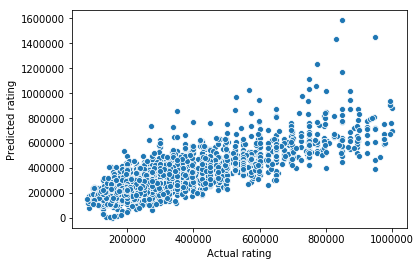

In [11]:
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.show()